# **Rasoul Qashqaei - Boston Linear Regresion - without SKLearn**

**Import Library**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Load the dataset**

In [83]:
BostonTrain = pd.read_csv("./BostonHousing.csv")
BostonTrain.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Define X, y**

In [84]:
X = BostonTrain.iloc[:, :-1].values
y = BostonTrain.iloc[:, -1].values

**Split the dataset into training and testing sets**

In [86]:
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Normalize the features**

In [87]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

**Define the linear regression model**

In [88]:
def linear_regression(X, weights, biases):
    return np.dot(X, weights) + biases

**Define the mean squared error (MSE) loss function**

In [89]:
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)


**Define the mean absolute error (MAE) loss function**

In [90]:
def mae_loss(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

**Initialize the weights and biases**

In [91]:
weights = np.zeros(X_train.shape[1])
biases = 0

**Set the hyperparameters**

In [92]:
learning_rate = 0.01
num_iterations = 1000

**Train the model**

In [93]:
for i in range(num_iterations):
    # Forward pass
    y_pred = linear_regression(X_train, weights, biases)

**Calculate the loss**

In [94]:
loss = mse_loss(y_pred, y_train)

**Backward pass**

In [95]:
grad_weights = np.dot(X_train.T, (y_pred - y_train)) / len(y_train)
grad_biases = np.mean(y_pred - y_train)

**Update the weights and biases**

In [96]:
weights -= learning_rate * grad_weights
biases -= learning_rate * grad_biases

**Print the loss every 100 iterations**

In [98]:
if i % 100 == 0:
  print(f"Iteration {i}, loss: {loss:.4f}")

**Test the model**

MSE on the testing set: 334.1998
MAE on the testing set: 16.406019625334523


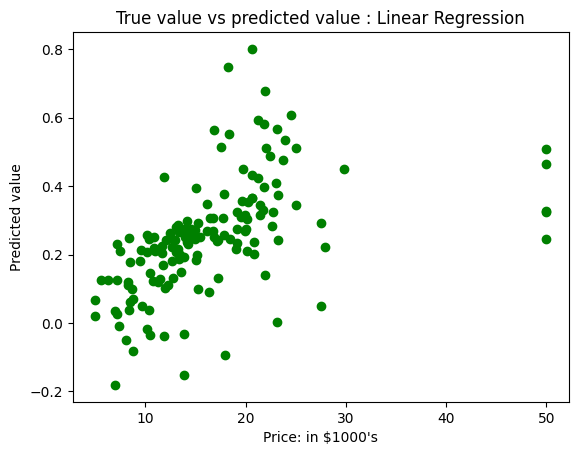

In [99]:
y_pred_test = linear_regression(X_test, weights, biases)
plt.scatter(y_test,y_pred_test, c = 'green');
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
mse_test = mse_loss(y_pred_test, y_test)
mae_test = mae_loss(y_pred_test, y_test)
print(f"MSE on the testing set: {mse_test:.4f}")
print("MAE on the testing set:", mae_test)